# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Displaying Images

In [2]:
picture_size = 48
folder_path = "images/"

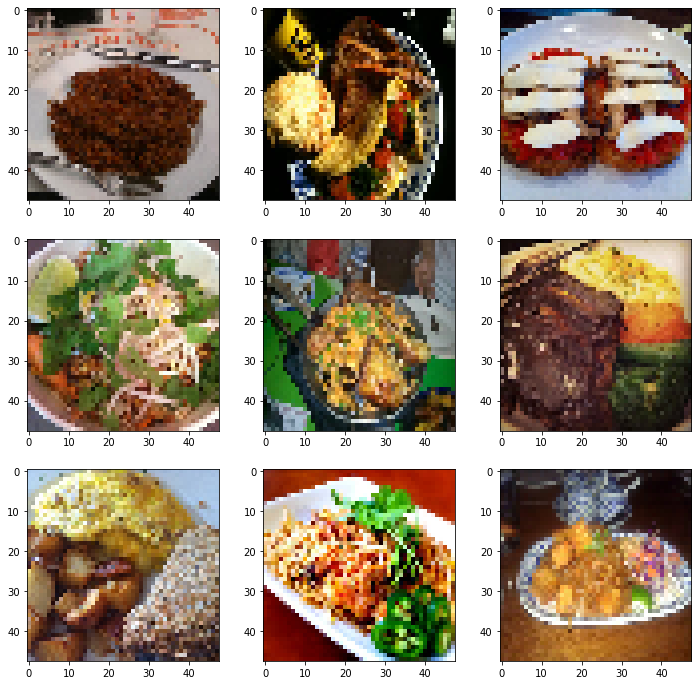

In [3]:
expression = 'healthy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [4]:
batch_size  = 250

#getting train and test images
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

#setting train images
train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

#setting test images
test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 5736 images belonging to 2 classes.
Found 1436 images belonging to 2 classes.


# CNN

In [5]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 2

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

# Fitting the Model with Training and Validation Data

In [12]:
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [13]:
#testing
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/48
22/22 [==============================] - 75s 3s/step - loss: 0.6829 - accuracy: 0.6114 - val_loss: 2.5128 - val_accuracy: 0.5376
Epoch 2/48
22/22 [==============================] - 79s 4s/step - loss: 0.6552 - accuracy: 0.6323 - val_loss: 2.4795 - val_accuracy: 0.5504
Epoch 3/48
22/22 [==============================] - 80s 4s/step - loss: 0.6358 - accuracy: 0.6491 - val_loss: 0.8948 - val_accuracy: 0.5840
Epoch 4/48
22/22 [==============================] - 82s 4s/step - loss: 0.6264 - accuracy: 0.6593 - val_loss: 1.1108 - val_accuracy: 0.4736
Epoch 5/48
22/22 [==============================] - 84s 4s/step - loss: 0.6148 - accuracy: 0.6713 - val_loss: 0.9047 - val_accuracy: 0.5776
Epoch 6/48
22/22 [==============================] - 82s 4s/step - loss: 0.5937 - accuracy: 0.6790 - val_loss: 0.6893 - val_accuracy: 0.5672
Epoch 7/48
22/22 [==============================] - 83s 4s/step - loss: 0.5849 - accuracy: 0.6914 - val_loss: 0.8962 - val_accuracy: 0.4864
Epoch 8/48
22/22 [==

# Evaluation using Confusion Matrix

6/6 [==============================] - 6s 922ms/step
Confusion Matrix
[[354 321]
 [299 462]]

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       675
           1       0.59      0.61      0.60       761

    accuracy                           0.57      1436
   macro avg       0.57      0.57      0.57      1436
weighted avg       0.57      0.57      0.57      1436



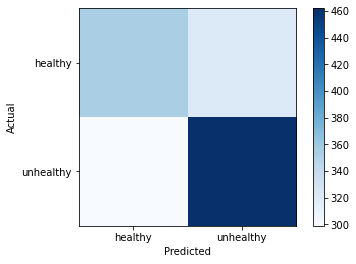

In [14]:
classes=['healthy','unhealthy']

validation_data = test_set

Y_pred = model.predict(test_set, steps = np.ceil(test_set.samples / test_set.batch_size), verbose=1, workers=0)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(validation_data.classes, y_pred)

#prints confusion matrix
print('Confusion Matrix')
print(cm)

#prints classification report
print('\nClassification Report')
print(classification_report(validation_data.classes,y_pred))

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted")
plt.ylabel("Actual")
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
plt.colorbar()
plt.show()